# Data Mining
# Assignment 1 - Advanced

## 1 - Manage the Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
### Import data 
df = pd.read_csv("dataset_mood_smartphone.csv", parse_dates=['time'])

# drop weird column (created by pandas)
del df['Unnamed: 0']

# Replace 'full date'('time') with date and time columns
df = df.rename(index=str, columns={"time": "full date"})
df.insert(2, 'date', [d.date() for d in df['full date']])
df['date'] = pd.to_datetime(df['date'])  
df.insert(3, 'time', [d.time() for d in df['full date']])
del df['full date']

display(df.head())
# # Creating a Database
# # all_dates = list(df['date'])
# all_patients = list(df['id'])

# for patient in ['AS14.01']:
# #     all_dates = list(df[df['id'] == patient]['date'])
# # #     patient_dates = patient['date']c
# # #     all_dates_patient = list(df['date'])
#     for date in ['2014-04-01']:
#         patient = df[df['id'] == patient]
#         patient_date_df = patient[patient['date']==date].sort_values(by=['date', 'time'], ascending=[True, True])

# display(patient_date_df)

,id,date,time,variable,value
0,AS14.01,2014-02-26,13:00:00,mood,6.0
1,AS14.01,2014-02-26,15:00:00,mood,6.0
2,AS14.01,2014-02-26,18:00:00,mood,6.0
3,AS14.01,2014-02-26,21:00:00,mood,7.0
4,AS14.01,2014-02-27,09:00:00,mood,6.0


### Statistics of the data

In [3]:
# Take a look at the number of data
print("* Data shape: {}\n".format(df.shape))

# Let's take a look at the statistics of the variables 
print("* 'id': \n{}\n ".format(df['id'].describe()))
print("\n* 'date': \n{}\n ".format(df['date'].describe()))
print("\n* 'variable': \n{}\n ".format(df['variable'].describe()))
print("\n* 'value': \n{}\n ".format(df['value'].describe()))

* Data shape: (376912, 5)

* 'id': 
count      376912
unique         27
top       AS14.01
freq        21999
Name: id, dtype: object
 

* 'date': 
count                  376912
unique                    113
top       2014-04-22 00:00:00
freq                     9615
first     2014-02-17 00:00:00
last      2014-06-09 00:00:00
Name: date, dtype: object
 

* 'variable': 
count     376912
unique        19
top       screen
freq       96578
Name: variable, dtype: object
 

* 'value': 
count    376710.000000
mean         40.665313
std         273.726007
min      -82798.871000
25%           2.025000
50%           7.029000
75%          29.356000
max       33960.246000
Name: value, dtype: float64
 


### Missing Data

In [4]:
# Check if there are any null values
nan_val = df.isnull().sum().sum()
if nan_val>0:
    print("There are {} NaN values.\n".format(nan_val))
    print(df.isnull().any())
    if nan_val<0.01*df.shape[0]:
        # Because it is a low number (less than 1% of the data), 
        # we can drop them.
        df = df.dropna()
        print("\n Because the NaN are <0.1%, we drop them.")
else:
    print("There is not any NaN values")

There are 202 NaN values.

id          False
date        False
time        False
variable    False
value        True
dtype: bool

 Because the NaN are <0.1%, we drop them.


### Finding Outliers

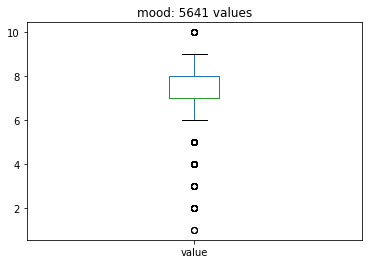

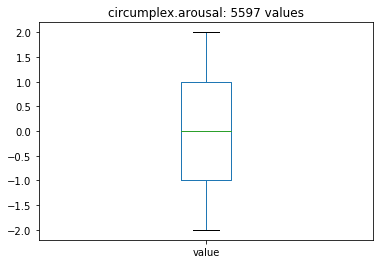

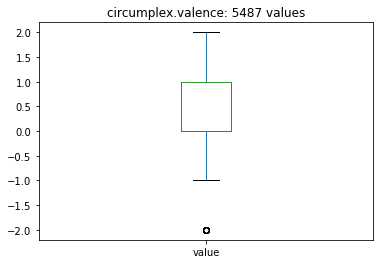

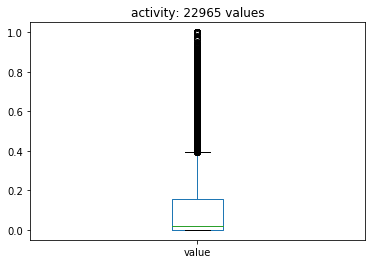

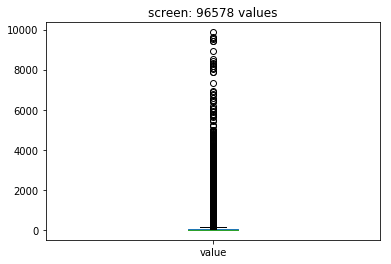

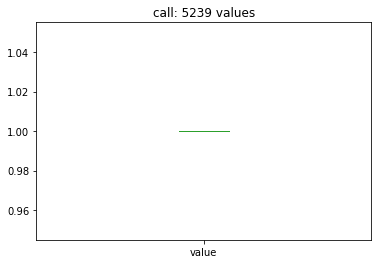

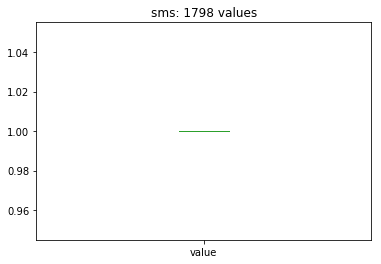

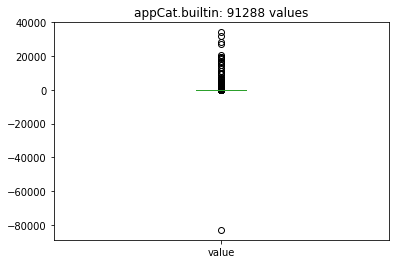

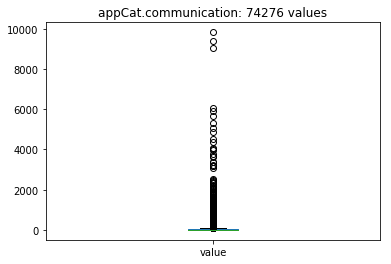

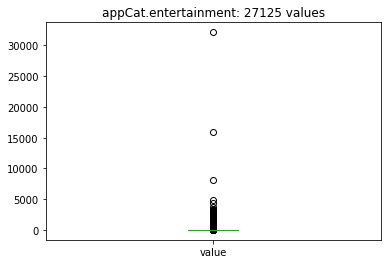

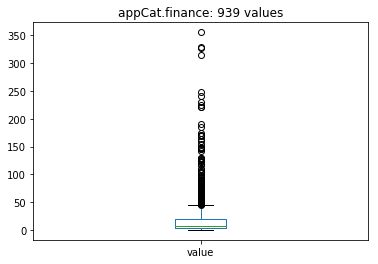

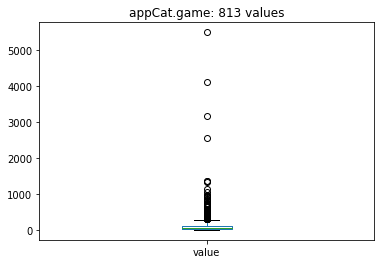

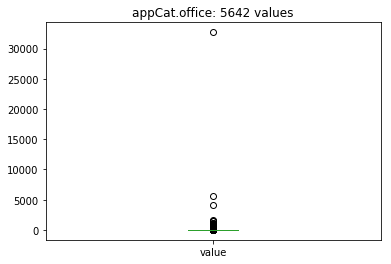

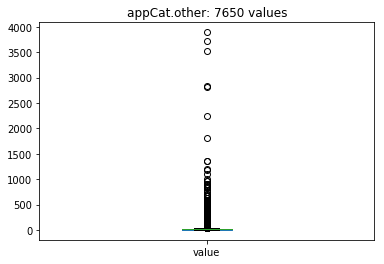

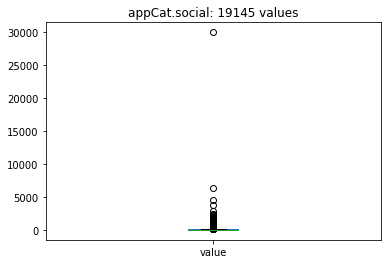

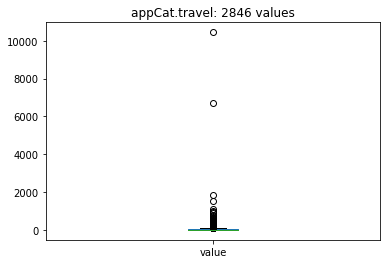

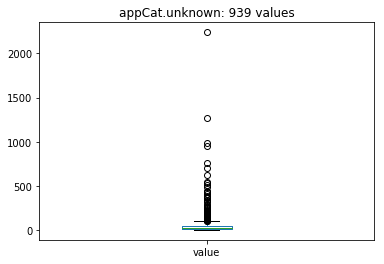

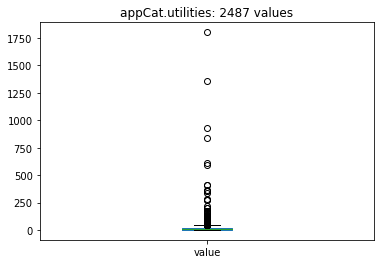

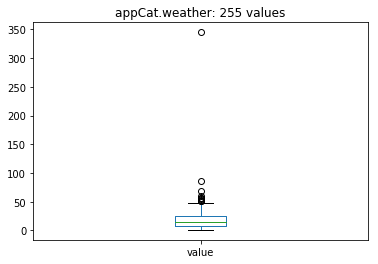

In [5]:
Q1, Q3, IQR, min_value, max_value  = {}, {}, {}, {}, {}
df_variable = {}

# Get all categories
categories = list(df['variable'].unique())
for variable in categories:
    # Creat a new dataframe for ever variable
    df_variable[variable] = df[df['variable'] == variable][['value']]
    n_values = df_variable[variable].shape[0]
    
    # Calculate the first quartile of the population values
    Q1[variable] = df_variable[variable].quantile(0.25)
    # Calculate the third quartile of the population values
    Q3[variable] = df_variable[variable].quantile(0.75)
    # Calculate the interquartile range Q3 - Q1
    IQR[variable] = Q3[variable] - Q1[variable]
    
    # Calculate the maximum value and minimum values according to the Tukey rule
    max_value[variable] = Q3[variable] + 1.5 * IQR[variable]
    min_value[variable] = Q1[variable] - 1.5 * IQR[variable]
    
    # Plot the boxplot of the values to spot the outliers
    ttl = variable + ": " + str(n_values) + " values"
    df_variable[variable][0:n_values].plot(kind='box', title=ttl);

In [6]:
# Filter the data for values that are greater than max_value 
# or less than min_value for each variable
variable_outliers, max_outliers, max_outliers, min_outliers  = {}, {}, {}, {}
for variable in categories:
    max_outliers[variable] = df[df['variable'] == variable]['value'] > max_value[variable].item()
    min_outliers[variable] = df[df['variable'] == variable]['value'] < min_value[variable].item()
    variable_outliers[variable] = df[df['variable'] == variable][(max_outliers[variable])|(min_outliers[variable])]

In [7]:
# Many of these aren't countries at all but rather aggregates of various countries. 
# Notice as well that the min_value calculated above was negative. According to 
# the Tukey rule, there are no minimum population outliers in this data set. If you 
# were going to study how population and gdp correlate, you might want to remove these 
# aggregated regions from the data set.

# Find variables outliers that are in both the mood and any other
two_val_outliers = {}
for v1 in categories:
    for v2 in categories:
        if v1 != v2:
            two_val_outliers[v1+str('-')+v2] = list(set(variable_outliers[v1].index).intersection(variable_outliers[v2].index))

In [8]:
# The style that they were stored
[*two_val_outliers.keys()][0:5]

['mood-circumplex.arousal',
 'mood-circumplex.valence',
 'mood-activity',
 'mood-screen',
 'mood-call']

In [9]:
df_outlier_removed = df.copy()

variable_outliers, max_outliers, max_outliers, min_outliers  = {}, {}, {}, {}
for variable in categories:
    max_outliers[variable] = df[df['variable'] == variable]['value'] > max_value[variable].item()
    min_outliers[variable] = df[df['variable'] == variable]['value'] < min_value[variable].item()
    variable_outliers[variable] = df[df['variable'] == variable][(max_outliers[variable]) & (min_outliers[variable])]
    df_outlier_removed[variable_outliers[variable]]

In [10]:
if df.shape[0] == df_outlier_removed.shape[0]:
    print('There are no outliers')

There are no outliers


In [ ]:
# x = list(df_variable['mood'])
# y = list(df_variable['screen'])
# text = df['id']

# fig, ax = plt.subplots(figsize=(15,10))
# ax.scatter(x, y)
# plt.title('mood vs screen')
# plt.xlabel('mood')
# plt.ylabel('screen')
# for i, txt in enumerate(text):
#     ax.annotate(txt, (x[i],y[i]))

x = list(df['variable'])
y = list(df['date'])
text = df['id']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('mood vs date')
plt.xlabel('mood')
plt.ylabel('date')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [37]:
# x = list(df_variable['mood'].values)
# y = list(df_variable['screen'].values)
# text = df['id']

# fig, ax = plt.subplots(figsize=(15,10))
# ax.scatter(x, y)
# plt.title('mood vs screen')
# plt.xlabel('mood')
# plt.ylabel('screen')
# for i, txt in enumerate(text):
#     ax.annotate(txt, (x[i],y[i]))

# Scaling Data

Scaling data. The terms **standardization** and **normalization** used interchangeably when referring to feature scaling. However, these are slightly different operations. Standardization refers to scaling a set of values so that they have a mean of zero and a standard deviation of one. Normalization refers to scaling a set of values so that the range if between zero and one.


In [39]:
def x_min_max(data):
    """
    args: an array of data as an input 
    
    returns: minimum and maximum of that array
    """
    minimum = min(data)
    maximum = max(data)
    return minimum, maximum

def normalize(x, x_min, x_max):
    """
    Input : a single value 
    
    Output : the normalized value
    """
    return (x - x_min) / (x_max - x_min)

In [43]:
x_min_max(df[df['variable'] == 'mood']['value'])

(1.0, 10.0)

In [58]:
class Normalizer():
    """
    The normalizer class receives a dataframe as its only input for initialization
    """    
    def __init__(self, dataframe):        
        self.params = []

        for column in dataframe:#.columns:
#             self.params.append(x_min_max(dataframe[column]))
            self.params.append(x_min_max(dataframe))


            
    def x_min_max(data):
        minimum = min(data)
        maximum = max(data)
        return minimum, maximum

    def normalize_data(self, x):
        normalized = []
        for i, value in enumerate(x):
            x_max = self.params[i][1]
            x_min = self.params[i][0]
            normalized.append((int(x[i]) - int(x_min)) / (int(x_max) - int(x_min)))
        return normalized

In [67]:
norm_mood = Normalizer(df[df['variable'] == 'screen']['value'])
norm_mood.params

KeyboardInterrupt: 

In [66]:
norm_mood.normalize_data([3])

[0.2222222222222222]

In [ ]:
patient = df[df['id'] == 'AS14.30']
patient[patient['time'] == '2014-03-20 15:00:00.000']

In [ ]:
moods = df[df['variable'] == 'mood']
unique_mood_ids = moods.groupby('id').head(1)['id']

# Build target values for each user 
# TODO: extend to target values for each day per user
targets = pd.DataFrame(columns=['IDX', 'AVG_DAY'], index=[0])
i = 0

for idx in unique_mood_ids:
    targets.at[i, 'IDX'] = idx
    targets.at[i, 'AVG_DAY'] = moods[moods['id'] == idx]['value'].mean()
    i += 1
targets.head(30)

# df[df['variable'] == variable][['value']]

In [209]:
df = pd.read_csv("processed_raw_all_data.csv", parse_dates=['time_id'])
del df['Unnamed: 0']

display(df.head())

,person_id,time_id,mood_time_id,appCat.finance,appCat.social,appCat.utilities,activity,appCat.entertainment,mood,appCat.game,...,circumplex.arousal,appCat.unknown,sms,appCat.weather,appCat.office,appCat.builtin,screen,call,circumplex.valence,appCat.communication
0,AS14.05,2014-03-26,09:00:00,0.0,0.000,0.0,1.787337,4551.700,5.0,0.0,...,-2.0,0.000,0.0,0.0,0.0,20.080,6686.735003,0.0,0.0,821.022
1,AS14.05,2014-03-26,12:00:00,0.0,0.000,0.0,0.719008,156.176,6.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,813.028001,0.0,0.0,421.545
2,AS14.05,2014-03-26,15:00:00,0.0,0.000,0.0,0.674331,869.652,6.0,0.0,...,0.0,408.834,1.0,0.0,0.0,2.011,41159.061995,0.0,1.0,30831.009
3,AS14.05,2014-03-26,18:00:00,0.0,0.000,0.0,0.182052,28.452,5.0,0.0,...,0.0,112.296,0.0,0.0,0.0,175.954,70659.316010,0.0,0.0,87112.352
4,AS14.05,2014-04-15,09:00:00,0.0,724.307,0.0,0.650244,28.527,6.0,0.0,...,-2.0,0.000,0.0,0.0,0.0,14.336,6322.745000,0.0,0.0,2060.588


In [210]:
persons_id = list(df['person_id'].unique())
data_id = df[df['person_id']==persons_id[2]]
data_id.head()

,person_id,time_id,mood_time_id,appCat.finance,appCat.social,appCat.utilities,activity,appCat.entertainment,mood,appCat.game,...,circumplex.arousal,appCat.unknown,sms,appCat.weather,appCat.office,appCat.builtin,screen,call,circumplex.valence,appCat.communication
439,AS14.06,2014-03-26,09:00:00,0.0,16899.220,0.0,0.557971,2710.880,8.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.000,4280.028000,0.0,1.0,6875.874
440,AS14.06,2014-03-26,12:00:00,0.0,567.018,0.0,0.401695,30301.808,7.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.000,36046.271999,0.0,1.0,10097.020
441,AS14.06,2014-03-26,18:00:00,0.0,9546.459,0.0,7.850000,58406.656,8.0,0.0,...,1.0,0.0,0.0,0.000,35.692,1857.654,186293.942055,4.0,2.0,45443.744
442,AS14.06,2014-03-26,21:00:00,0.0,340.983,0.0,0.300210,8303.280,9.0,0.0,...,1.0,0.0,0.0,0.000,0.000,6.106,6158.628003,0.0,2.0,1212.363
443,AS14.06,2014-04-15,09:00:00,0.0,6943.680,0.0,1.907246,11317.740,7.0,0.0,...,-1.0,0.0,0.0,24.112,0.000,663.552,8551.134001,0.0,1.0,24724.512


In [211]:
# split to target and x
# x = df.loc[:, df.columns != 'mood_time_id', 'time_id']
x = df.drop(['mood_time_id', 'time_id', 'person_id', 'mood'], axis=1)
t = df[['mood']]

In [212]:
# preprocessing
from sklearn import preprocessing

x = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled)

# DecisionTreeClassifier

In [213]:
x_scaled.isnull().sum().sum()
x_scaled = x_scaled.fillna(0)

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, t, test_size=0.2, random_state=42)

In [215]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [216]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9572251773049646
The test accuracy is 0.4508414526129318


In [217]:
### improving the model

# Training the model
model = DecisionTreeClassifier(max_depth=13, min_samples_leaf=20, min_samples_split=80)
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.6028368794326241
The test accuracy is 0.5465013286093888


# naive_bayes

In [218]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

/Users/johngatopoulos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [219]:
predictions = naive_bayes.predict(X_test)

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test.values, predictions, average='micro')))
print('Precision score: ', format(precision_score(y_test.values, predictions, average=None)))
print('Recall score: ', format(recall_score(y_test, predictions, average='micro')))
print('Precision score: ', format(recall_score(y_test.values, predictions, average=None)))
print('F1 score: ', format(f1_score(y_test, predictions, average='micro')))

Accuracy score:  0.44729849424269263
Precision score:  0.44729849424269263
Precision score:  [0.         0.         0.         0.         0.         0.
 0.44769504 0.         0.         0.         0.         0.
 0.        ]
Recall score:  0.44729849424269263
Precision score:  [0.         0.         0.         0.         0.         0.
 0.99802372 0.         0.         0.         0.         0.
 0.        ]
F1 score:  0.44729849424269263


/Users/johngatopoulos/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [221]:
# Import the Bagging, RandomForest, and AdaBoost Classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [222]:
# Instantiate a BaggingClassifier with:
# 200 weak learners (n_estimators) and everything else as default values
bag_mod = BaggingClassifier(n_estimators=200)


# Instantiate a RandomForestClassifier with:
# 200 weak learners (n_estimators) and everything else as default values
rf_mod = RandomForestClassifier(n_estimators=200)

# Instantiate an a AdaBoostClassifier with:
# With 300 weak learners (n_estimators) and a learning_rate of 0.2
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

In [223]:
# Fit your BaggingClassifier to the training data
bag_mod.fit(X_train, y_train)

# Fit your RandomForestClassifier to the training data
rf_mod.fit(X_train, y_train)

# Fit your AdaBoostClassifier to the training data
ada_mod.fit(X_train, y_train)



/Users/johngatopoulos/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/johngatopoulos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/johngatopoulos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=300, random_state=None)

In [224]:
# Predict using BaggingClassifier on the test data
bag_preds = bag_mod.predict(X_test) 

# Predict using RandomForestClassifier on the test data
rf_preds = rf_mod.predict(X_test)

# Predict using AdaBoostClassifier on the test data
ada_preds = ada_mod.predict(X_test)

In [227]:
def print_metrics(y_true, preds, model_name=None):
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds, average='micro')))
        print('Recall score: ', format(recall_score(y_true, preds, average='micro')))
        print('F1 score: ', format(f1_score(y_true, preds, average='micro')))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds, average='micro')))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds, average='micro')))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds, average='micro')))
        print('\n\n')

In [228]:
# Print Bagging scores
print_metrics(y_test, bag_preds, 'bagging')

# Print Random Forest scores
print_metrics(y_test, rf_preds, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, ada_preds, 'adaboost')

Accuracy score for bagging : 0.5394154118689105
Precision score bagging : 0.5394154118689105
Recall score bagging : 0.5394154118689105
F1 score bagging : 0.5394154118689105



Accuracy score for random forest : 0.5225863596102746
Precision score random forest : 0.5225863596102746
Recall score random forest : 0.5225863596102746
F1 score random forest : 0.5225863596102746



Accuracy score for adaboost : 0.31886625332152346
Precision score adaboost : 0.31886625332152346
Recall score adaboost : 0.31886625332152346
F1 score adaboost : 0.31886625332152346



Accuracy score for naive bayes : 0.44729849424269263
Precision score naive bayes : 0.44729849424269263
Recall score naive bayes : 0.44729849424269263
F1 score naive bayes : 0.44729849424269263



